Correlation Matrix:
                sediment_thick       gwt    predom      vs30       dem  \
sediment_thick        1.000000 -0.216763  0.842865 -0.714979 -0.612316   
gwt                  -0.216763  1.000000 -0.253263  0.247926  0.106787   
predom                0.842865 -0.253263  1.000000 -0.740071 -0.632388   
vs30                 -0.714979  0.247926 -0.740071  1.000000  0.572196   
dem                  -0.612316  0.106787 -0.632388  0.572196  1.000000   
pga                   0.324652  0.247579  0.301166 -0.395725 -0.393711   
geo_form              0.279673 -0.152896  0.388118 -0.227223 -0.265748   
near_dis             -0.376476  0.024184 -0.446482  0.357406  0.317857   
near_dis_norm        -0.377148  0.024713 -0.447509  0.358859  0.318728   
near_dist            -0.422079  0.013253 -0.515818  0.432735  0.414401   
LIQ                   0.736590 -0.247550  0.807827 -0.638401 -0.564791   

                     pga  geo_form  near_dis  near_dis_norm  near_dist  \
sediment_thick  0

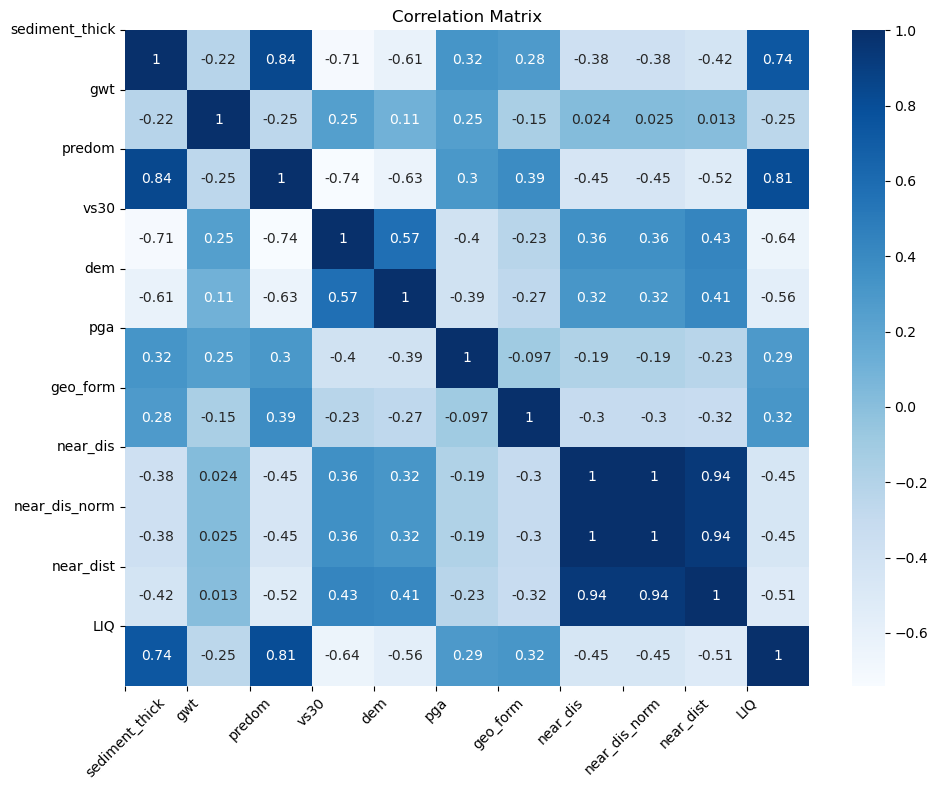

Variance Inflation Factor (VIF):
        VIF        features
0  2.769109        near_dis
1  8.492843  sediment_thick
2  8.988764          predom
3  8.696044            vs30
4  5.027700             pga
5  6.135978        geo_form
Feature Importance (Information Gain Ratio):
Feature 1: near_dis (importance: 0.179)
Feature 2: sediment_thick (importance: 0.299)
Feature 3: predom (importance: 0.384)
Feature 4: vs30 (importance: 0.234)
Feature 5: pga (importance: 0.132)
Feature 6: geo_form (importance: 0.336)


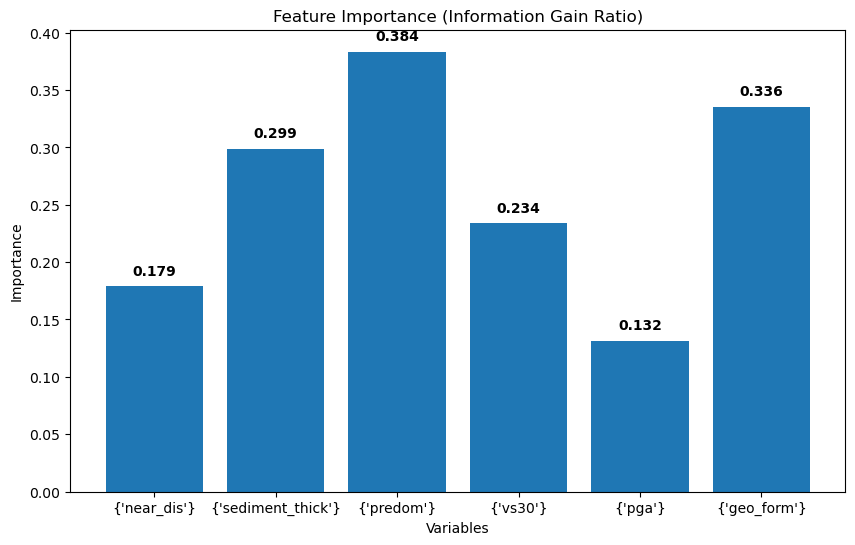

Accuracy: 0.929
Precision: 0.877
Recall: 0.905
F1 score: 0.891
Mean Squared Root: 0.071
AUC score: 0.963
AUC error: 0.037
Cohen Kappa Score: 0.838
Confusion Matrix:
[[127   8]
 [  6  57]]
True Positive Rate: 0.905
False Positive Rate: 0.059
True Negative Rate: 0.941
False Negative Rate: 0.095


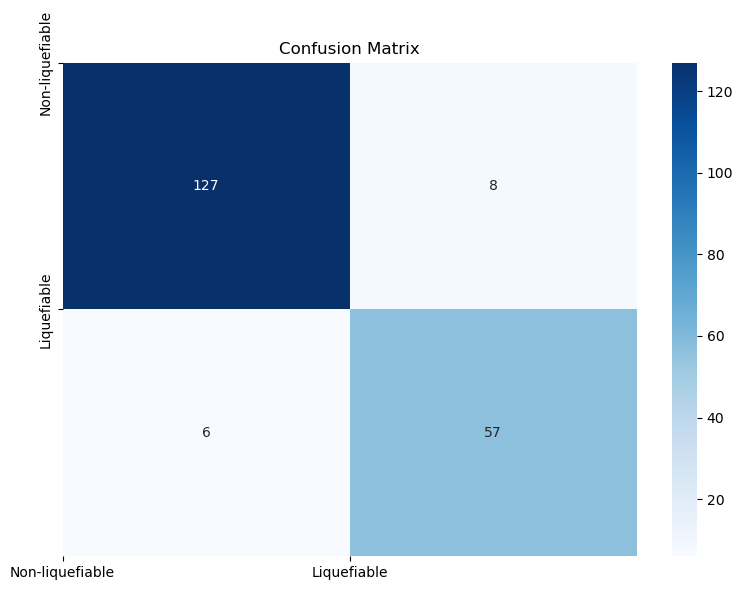

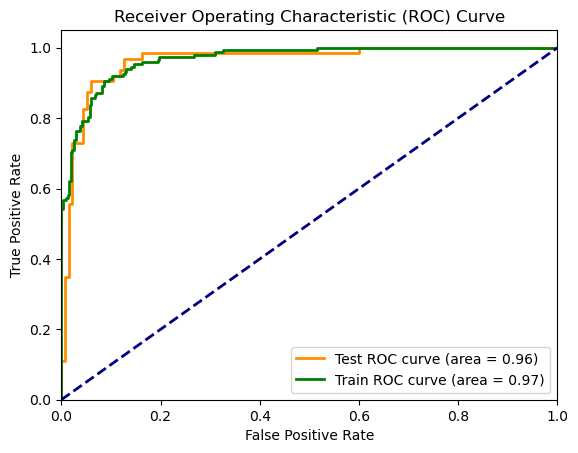

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_classif

# Load the dataset
data = pd.read_csv("C:\\Users\\LE\\Downloads\\THESIS\\Program\\CSV\\GRID_LABEL_KTMBASIN_classify_v2.2.csv")

# Calculate correlation of the dataset
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Draw heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
#plt.imshow(correlation_matrix, interpolation='nearest')
plt.title("Correlation Matrix")
#plt.colorbar()
tick_marks = [i for i in range(len(data.columns))]
plt.xticks(tick_marks, data.columns, rotation=45)
plt.yticks(tick_marks, data.columns)
plt.tight_layout()
plt.show()

# Preprocess the data
# Split the data into training and testing sets
X = data[["near_dis", "sediment_thick", "predom", "vs30", "pga", "geo_form"]]
y = data["LIQ"]

TEST_SIZE = 0.3
RANDOM_STATE = 36

# Get hyperparameters from user
# kernel = ['linear', 'poly', rbf', sigmoid']
# C = [0.001, 0.01, 0.1, 1, 10, 100]
# gamma = [0.001, 0.01, 0.1, 1, 10, 100, 'auto']
# degree = [2, 3, 4, 5]
# probability = ['True', 'False']

kernel = 'linear'
C = 225
gamma = 'scale'
degree = 1
probability = bool('True')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

# Calculate VIF
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['features'] = X_train.columns
print("Variance Inflation Factor (VIF):")
print(vif)

# Calculate feature importance using Information Gain Ratio
information_gain_ratio = mutual_info_classif(X_train, y_train)
print("Feature Importance (Information Gain Ratio):")
for i, importance in enumerate(information_gain_ratio):
    print(f"Feature {i+1}: {X.columns[i]} (importance: {importance:.3f})")

# Draw bar chart for feature importance using Information Gain Ratio
plt.figure(figsize=(10, 6))
plt.bar(range(len(information_gain_ratio)), information_gain_ratio, align="center")
plt.xticks(range(len(information_gain_ratio)), [{X.columns[i]} for i in range(len(information_gain_ratio))])
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.title("Feature Importance (Information Gain Ratio)")
for i,v in enumerate(information_gain_ratio):
    plt.text(i,v+0.01,f"{v:.3f}", ha="center", weight="bold")
plt.show()

# Create SVM model
if kernel == "poly":
    svm_model = SVC(kernel=kernel, C=C, degree=degree, probability=probability)
elif kernel == "rbf":
    svm_model = SVC(kernel=kernel, C=C, gamma=gamma, probability=probability)
else:
    svm_model = SVC(kernel=kernel, C=C, probability=probability)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)
y_pred_proba_test = svm_model.predict_proba(X_test)[:, 1]

## MODEL EVALUATION
# For accuracy
accuracy = accuracy_score(y_test, y_pred)
# For regression
mse = mean_squared_error(y_test, y_pred)
# For precision
precision = precision_score(y_test, y_pred)
# For recall
recall = recall_score(y_test, y_pred)
# For f1 score
f1 = f1_score(y_test, y_pred)

# For AUC score
auc_score = roc_auc_score(y_test, y_pred_proba_test)
auc_error = 1 - auc_score

# For Cohen-Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")
print(f"Mean Squared Root: {mse:.3f}")
print(f"AUC score: {auc_score:.3f}")
print(f"AUC error: {auc_error:.3f}")
print(f"Cohen Kappa Score: {kappa:.3f}")

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Calculate true positive rate, false positive rate, true negative rate, false negative rate
tn, fp, fn, tp = conf_mat.ravel()
tpr = tp / (tp + fn)  # True positive rate
fpr = fp / (fp + tn)  # False positive rate
tnr = tn / (tn + fp)  # True negative rate
fnr = fn / (fn + tp)  # False negative rate

print(f"True Positive Rate: {tpr:.3f}")
print(f"False Positive Rate: {fpr:.3f}")
print(f"True Negative Rate: {tnr:.3f}")
print(f"False Negative Rate: {fnr:.3f}")

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt = '.0f')
#plt.imshow(conf_mat, interpolation='nearest')
plt.title("Confusion Matrix")
#plt.colorbar()
tick_marks = [i for i in range(2)]
plt.xticks(tick_marks, ["Non-liquefiable", "Liquefiable"], rotation=0)
plt.yticks(tick_marks, ["Non-liquefiable", "Liquefiable"])
plt.tight_layout()
plt.show()

# Compute permutation importance
result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE)

# Compute AUROC curve for test data
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Compute AUROC curve for train data
y_pred_proba_train = svm_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Plot AUROC curve for both test and train data
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='green', lw=2, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [5]:
mean_score = accuracy_score(y_test, y_pred)
print("Mean Score:", mean_score)

Mean Score: 0.9292929292929293


In [6]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(rmse)

0.0707070707070707
0.26590801173915524


In [8]:
import numpy as np

# Calculate standard deviation of each input parameter
std_near_dis = np.std(X_train['near_dis'])
std_sediment_thick = np.std(X_train['sediment_thick'])
std_vs30 = np.std(X_train['vs30'])
std_predom = np.std(X_train['predom'])
std_pga = np.std(X_train['pga'])
std_geo_form = np.std(X_train['geo_form'])

# Calculate tolerance as 10% of standard deviation
tol_near_dis = std_near_dis * 0.1
tol_sediment_thick = std_sediment_thick * 0.1
tol_vs30 = std_vs30 * 0.1
tol_predom = std_predom * 0.1
tol_pga = std_pga * 0.1
tol_geo_form = std_geo_form * 0.1

print("Tolerance of input parameters:")
print(f"near_dis: {tol_near_dis:.3f}")
print(f"sediment_thick: {tol_sediment_thick:.3f}")
print(f"vs30: {tol_vs30:.3f}")
print(f"predom: {tol_predom:.3f}")
print(f"pga: {tol_pga:.3f}")
print(f"geomap: {tol_geo_form:.3f}")

Tolerance of input parameters:
near_dis: 0.194
sediment_thick: 0.227
vs30: 0.062
predom: 0.298
pga: 0.210
geomap: 0.397


In [45]:
import geopandas as gpd
import numpy as np
import pandas as pd

# Read the shapefile
gdf = gpd.read_file(r'D:\\ARC GIS\\KTM VALLEY\\WGS_1984_UTM_ZONE_45N\\GRID\\GRID_LABEL_KTMBASIN_Classify_v2.2.shp')

# Repeat the predictions to match the number of features
y_pred_repeated = np.repeat(y_pred_proba_test, len(gdf) // len(y_pred_proba_test) + 1)[:len(gdf)]

# Create a new DataFrame with the repeated predictions
df = pd.DataFrame(y_pred_repeated, columns=['LSM'])

# Reset the index of the GeoDataFrame to create a unique index
gdf.reset_index(drop=True, inplace=True)

# Assign the repeated predictions to a new column in the GeoDataFrame
gdf['LSM'] = df['LSM']

# Set the CRS
gdf.set_crs(epsg=32645, inplace=True)

# Save the GeoDataFrame to a new shapefile
gdf.to_file(r'D:\\ARC GIS\\KTM VALLEY\\WGS_1984_UTM_ZONE_45N\\METHOD 2\\Classify_v2.2\\method2_grid_1_0.3_36_SVM_CLassify_v2.2.shp')

In [12]:
import pandas as pd

# Create a DataFrame with X_test, y_test, and y_pred_test
df = pd.DataFrame(X_test, columns=X.columns)
df['LIQ'] = y_test
df['Predicted_LIQ'] = y_pred

# Print the DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df)

# Export the DataFrame to an Excel file
#df.to_excel('output_SVM.xlsx', index=False)

     near_dis  bedrockdep  predom  vs30  pga  geo_form  LIQ  Predicted_LIQ
100      1.03           6       9     2    5         7    1              1
170      1.17           7       9     2    4        13    1              1
315      6.78           1       2     2    8         4    0              0
445      1.10           1       1     3    1         9    0              0
428      3.91           3       1     3    2         8    0              0
254      0.05           3       8     2    4        11    1              1
490      2.59           1       1     3    1         9    0              0
60       2.59           1       1     3    5         6    0              0
524      2.55           1       1     3    1         9    0              0
135      0.03           7       9     2    5        11    1              1
348      1.31           1       1     3    5         3    0              0
334      7.45           1       1     3    4         2    0              0
495      1.99           1

Correlation Matrix:
                  Id  EASTING_X  NORTHING_Y  NEAR_DIST  bedrockdep       gwt  \
Id          1.000000   0.992609    0.992609   0.184710   -0.014659 -0.503268   
EASTING_X   0.992609   1.000000    1.000000   0.201224    0.036075 -0.526195   
NORTHING_Y  0.992609   1.000000    1.000000   0.201224    0.036075 -0.526195   
NEAR_DIST   0.184710   0.201224    0.201224   1.000000   -0.374233  0.046478   
bedrockdep -0.014659   0.036075    0.036075  -0.374233    1.000000 -0.216763   
gwt        -0.503268  -0.526195   -0.526195   0.046478   -0.216763  1.000000   
predom      0.077754   0.118491    0.118491  -0.434952    0.842865 -0.253263   
vs30       -0.040734  -0.086495   -0.086495   0.348986   -0.714979  0.247926   
dem_ktm     0.020399  -0.021518   -0.021518   0.289869   -0.612316  0.106787   
pga        -0.672943  -0.619569   -0.619569  -0.163342    0.324652  0.247579   
geomap      0.207581   0.204588    0.204588  -0.310323    0.279673 -0.152896   
LIQ         0.055129

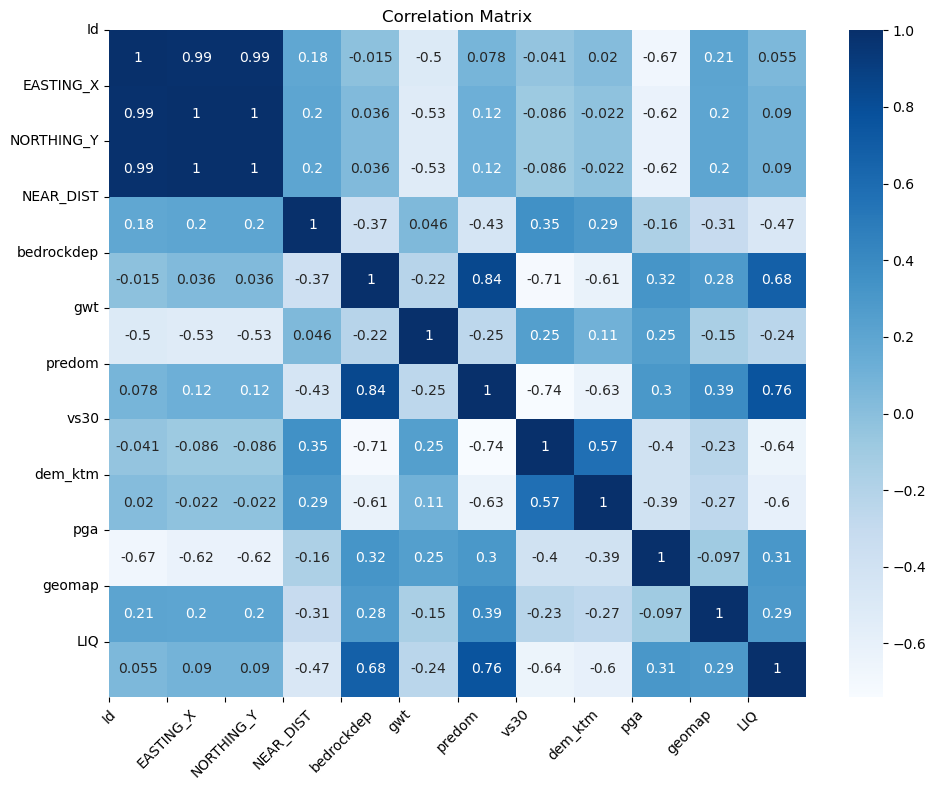

Variance Inflation Factor (VIF):
        VIF    features
0  2.633816   NEAR_DIST
1  8.467769  bedrockdep
2  8.504540        vs30
3  8.949885      predom
4  5.025018         pga
5  6.160987      geomap
Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'poly', 'probability': True}
Best Score: 0.8812061711079944
Feature Importance (Information Gain Ratio):
Feature 1: NEAR_DIST (importance: 0.182)
Feature 2: bedrockdep (importance: 0.270)
Feature 3: vs30 (importance: 0.246)
Feature 4: predom (importance: 0.363)
Feature 5: pga (importance: 0.170)
Feature 6: geomap (importance: 0.325)


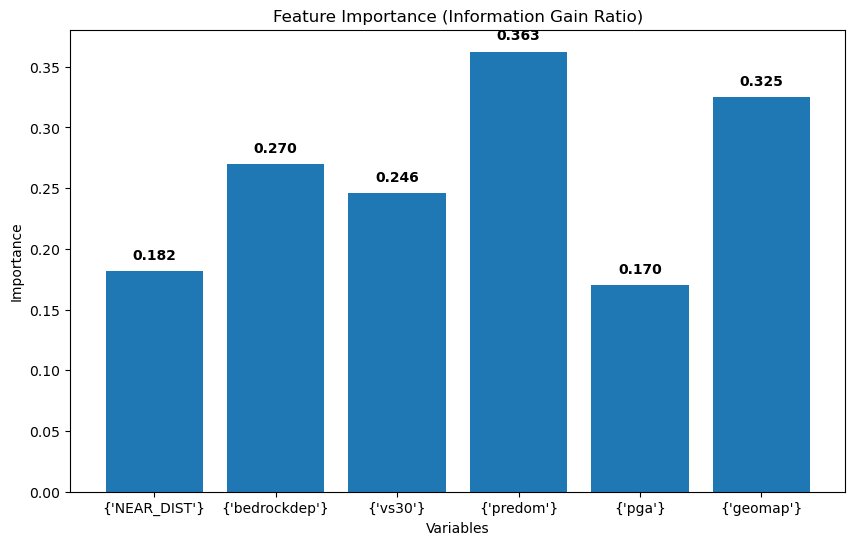

Accuracy: 0.843
Precision: 0.792
Recall: 0.781
F1 score: 0.786
Mean Squared Root: 0.157
AUC score: 0.924
AUC error: 0.076
Cohen Kappa Score: 0.663
Confusion Matrix:
[[110  15]
 [ 16  57]]
True Positive Rate: 0.781
False Positive Rate: 0.120
True Negative Rate: 0.880
False Negative Rate: 0.219


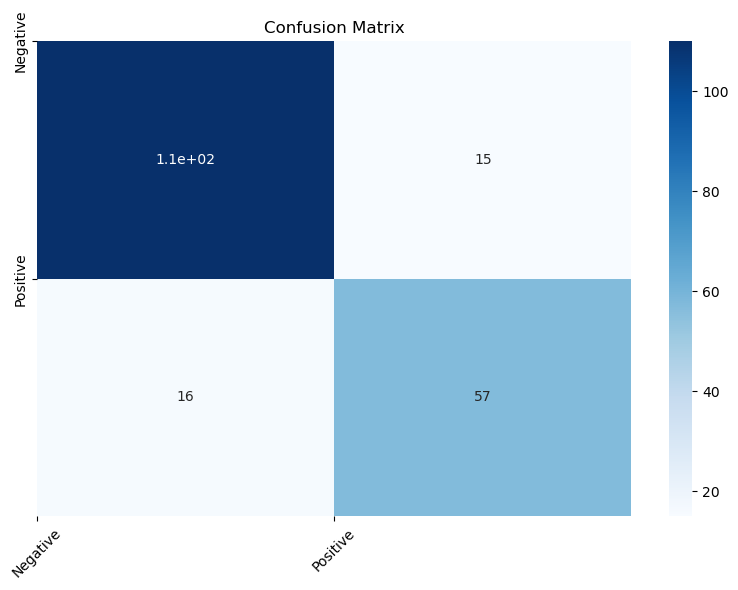

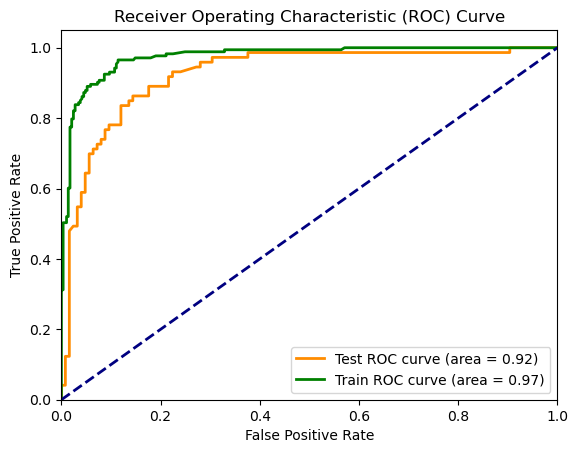

In [71]:
### FOR HYPERTUNING ONLY ###
## MINIMUM ETA = MORE THAN 3 HOURS ##

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_classif

# Load the dataset
data = pd.read_csv("C:\\Users\\LE\\Downloads\\THESIS\\Program\\CSV\\GRID_LABEL_KTMBASIN_1KM_Classify.csv")

# Calculate correlation of the dataset
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Draw heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
#plt.imshow(correlation_matrix, interpolation='nearest')
plt.title("Correlation Matrix")
#plt.colorbar()
tick_marks = [i for i in range(len(data.columns))]
plt.xticks(tick_marks, data.columns, rotation=45)
plt.yticks(tick_marks, data.columns)
plt.tight_layout()
plt.show()

# Preprocess the data
# Split the data into training and testing sets
X = data[["NEAR_DIST", "bedrockdep", "vs30", "predom", "pga", "geomap"]]
y = data["LIQ"]

TEST_SIZE = 0.3
RANDOM_STATE = 36

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

# Calculate VIF
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['features'] = X_train.columns
print("Variance Inflation Factor (VIF):")
print(vif)

# Define hyperparameter tuning space
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'probability': [True]
}

# Perform hyperparameter tuning
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate feature importance using Information Gain Ratio
information_gain_ratio = mutual_info_classif(X_train, y_train)
print("Feature Importance (Information Gain Ratio):")
for i, importance in enumerate(information_gain_ratio):
    print(f"Feature {i+1}: {X.columns[i]} (importance: {importance:.3f})")

# Draw bar chart for feature importance using Information Gain Ratio
plt.figure(figsize=(10, 6))
plt.bar(range(len(information_gain_ratio)), information_gain_ratio, align="center")
plt.xticks(range(len(information_gain_ratio)), [{X.columns[i]} for i in range(len(information_gain_ratio))])
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.title("Feature Importance (Information Gain Ratio)")
for i,v in enumerate(information_gain_ratio):
    plt.text(i,v+0.01,f"{v:.3f}", ha="center", weight="bold")
plt.show()

## MODEL EVALUATION
# For accuracy
accuracy = accuracy_score(y_test, y_pred)
# For regression
mse = mean_squared_error(y_test, y_pred)
# For precision
precision = precision_score(y_test, y_pred)
# For recall
recall = recall_score(y_test, y_pred)
# For f1 score
f1 = f1_score(y_test, y_pred)

# For AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
auc_error = 1 - auc_score

# For Cohen-Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")
print(f"Mean Squared Root: {mse:.3f}")
print(f"AUC score: {auc_score:.3f}")
print(f"AUC error: {auc_error:.3f}")
print(f"Cohen Kappa Score: {kappa:.3f}")

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Calculate true positive rate, false positive rate, true negative rate, false negative rate
tn, fp, fn, tp = conf_mat.ravel()
tpr = tp / (tp + fn)  # True positive rate
fpr = fp / (fp + tn)  # False positive rate
tnr = tn / (tn + fp)  # True negative rate
fnr = fn / (fn + tp)  # False negative rate

print(f"True Positive Rate: {tpr:.3f}")
print(f"False Positive Rate: {fpr:.3f}")
print(f"True Negative Rate: {tnr:.3f}")
print(f"False Negative Rate: {fnr:.3f}")

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
#plt.imshow(conf_mat, interpolation='nearest')
plt.title("Confusion Matrix")
#plt.colorbar()
tick_marks = [i for i in range(2)]
plt.xticks(tick_marks, ["Negative", "Positive"], rotation=45)
plt.yticks(tick_marks, ["Negative", "Positive"])
plt.tight_layout()
plt.show()

# Compute permutation importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=RANDOM_STATE)

# Compute AUROC curve for test data
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Compute AUROC curve for train data
y_pred_proba_train = best_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Plot AUROC curve for both test and train data
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='green', lw=2, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()